# Change Working Directory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import csv
import seaborn as sns
import graphviz
%matplotlib inline

/Users/skiparay/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
abspath = os.path.abspath('OO_Importing_Data.py') # Get filepath
dname = os.path.dirname(abspath) # Get directory
os.chdir(dname) # Make directory working directory

In [3]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.style.use(['fivethirtyeight'])

# EDA

## Reading in the Data

In [4]:
data = pd.read_json('assets/newdump.json')

## Splitting up the 'Channel Info' dictionaries into seperate columns

In [5]:
data['channel_type'] = [x['type'] for x in data['channel_info']]
data['channel'] = [x['channel'] for x in data['channel_info']]

In [6]:
data.drop('channel_info', axis = 1, inplace=True)

## Showing only Facebook and Instagram Data

In [7]:
FB_and_IG_data = data.loc[(data['channel'] == 'facebook') | (data['channel'] == 'instagram')]

## Removing '' and [] from 'type' column for queries

In [8]:
FB_and_IG_data['channel_type'] = FB_and_IG_data['channel_type'].apply(lambda x: x[0])

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Breaking down number of entries for each type of post. Looks like Facebook is a clear winner

In [9]:
FB_and_IG_data['type'].value_counts()

facebook post    249485
instagram pic     17526
instagram vid      2664
Name: type, dtype: int64

## Replacing Values in 'brand' with the actual publication

In [10]:
FB_and_IG_data['brand'].value_counts()

137322    46545
137326    37444
137329    32608
137299    31680
137316    28308
137325    25983
137321    24165
137314    22100
137300    20842
Name: brand, dtype: int64

Found these by plugging urls into google and seeing what showed up
* Brand 137314 = Conde Naste Traveler
* Brand 137329 = W Magazine
* Brand 137321 = OnSelf Magazine
* Brand 137325 = Vanity Fair
* Brand 137300 = Clever
* Brand 137322 = Teen Vogue
* Brand 137299 = Allure
* Brand 137326 = Vogue
* Brand 137316 = Glamor

In [11]:
brands = {137314 : 'CondeNasteTraveler', 
          137329 : 'WMagazine',
          137321 : 'Onself',
          137325 : 'VanityFair', 
          137300 : 'Clever', 
          137322 : 'TeenVogue', 
          137299 : 'Allure', 
          137326 : 'Vogue',137316 : 'Glamor'
         }
FB_and_IG_data['brand'] = FB_and_IG_data['brand'].map(brands)                                                     

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


## Taking a subset of just the Instagram data

In [12]:
instagram = FB_and_IG_data.loc[FB_and_IG_data['type'].isin(['instagram pic', 'instagram vid'])]

In [13]:
instagram = instagram.reset_index(drop=True)

## Getting data from the content column

In [14]:
instacontent = instagram['content']

In [15]:
sum([instacontent[i].keys() == instacontent[0].keys() for i in range(len(instacontent))])
#Seeing how many image entries we have.

17526

In [16]:
sum([instacontent[i].keys() != instacontent[0].keys() for i in range(len(instacontent))])
#Seeing how many video entries we have.

2664

## Splitting Instagram data into seperate image and video frames

In [17]:
instapics = instagram.loc[(instagram['type'] == 'instagram pic')]
instapics = instapics.reset_index(drop=True)

In [18]:
instavids = instagram.loc[(instagram['type'] == 'instagram vid')]
instavids = instavids.reset_index(drop=True)

In [19]:
instapicscontent = instapics['content']

In [20]:
picframe = pd.DataFrame.from_dict(instapicscontent)

In [21]:
instavidscontent = instavids['content']

In [22]:
vidframe = pd.DataFrame.from_dict(instavidscontent)

In [23]:
picframe['caption']  = [x['caption'] for x in instapics['content']]
picframe['comment_count']  = [x['comment_count'] for x in instapics['content']]
picframe['filter_name'] = [x['filter_name'] for x in instapics['content']]
picframe['hashtags'] = [x['hashtags'] for x in instapics['content']]
picframe['image_url'] = [x['image_url'] for x in instapics['content']]
picframe['like_count'] = [x['like_count'] for x in instapics['content']]
picframe['link'] = [x['link'] for x in instapics['content']]
picframe['links'] = [x['links'] for x in instapics['content']]
picframe['post_id'] = [x['post_id'] for x in instapics['content']]

In [24]:
picframe.drop(['content'], axis = 1, inplace = True)
picframe = picframe.reset_index(drop=True)
picframe.head()

,caption,comment_count,filter_name,hashtags,image_url,like_count,link,links,post_id
0,@JLo & @ARod isn't just another love story; it...,164,Normal,,https://scontent.cdninstagram.com/t51.2885-15/...,22678,https://www.instagram.com/p/BbikmregLBQ/,[],1649041401268187216_11206038
1,We're still not over all the cute moments 😍 a...,3,Normal,GlamourWOTY,https://scontent.cdninstagram.com/t51.2885-15/...,512,https://www.instagram.com/p/BbibiLwDKPX/,[],1649001509906326487_10070230
2,"It's no secret how much we love makeup, and if...",11,Normal,EditorsFaves,https://scontent.cdninstagram.com/t51.2885-15/...,1117,https://www.instagram.com/p/BbiXLd9BWmc/,[],1648982356717300124_24852591
3,Amber Heard has one simple trick for narrowing...,101,Normal,,https://scontent.cdninstagram.com/t51.2885-15/...,16608,https://www.instagram.com/p/BbiQFGHgTMh/,[],1648951132480942881_11206038
4,By painting the home office of a Nolita loft b...,37,Normal,linkinbio,https://scontent.cdninstagram.com/t51.2885-15/...,6508,https://www.instagram.com/p/BbiLW7MHu6Y/,[],1648930367465254552_239180867


In [25]:
vidframe['caption'] = [x['caption'] for x in instavids['content']]
vidframe['comment_count'] = [x['comment_count'] for x in instavids['content']]
vidframe['filter_name'] = [x['filter_name'] for x in instavids['content']]
vidframe['hashtags'] = [x['hashtags'] for x in instavids['content']]
vidframe['image_url'] = [x['image_url'] for x in instavids['content']]
vidframe['like_count'] = [x['like_count'] for x in instavids['content']]
vidframe['link'] = [x['link'] for x in instavids['content']]
vidframe['links'] = [x['links'] for x in instavids['content']]
vidframe['post_id'] = [x['post_id'] for x in instavids['content']]
vidframe['video_url'] = [x['video_url'] for x in instavids['content']]

In [26]:
vidframe.drop(['content'], axis = 1, inplace = True)
vidframe.reset_index(drop=True, inplace = True)
vidframe.head()

,caption,comment_count,filter_name,hashtags,image_url,like_count,link,links,post_id,video_url
0,We asked people to explain in their own words ...,1,Normal,linkinbio health wellness birthcontrol,https://scontent.cdninstagram.com/t51.2885-15/...,103,https://www.instagram.com/p/BbiFr_fHgFs/,[],1648905426908873068_13622784,https://scontent.cdninstagram.com/t50.2886-16/...
1,@traceeellisross breaks down in a powerful tal...,110,Normal,linkinbio glamourwoty,https://scontent.cdninstagram.com/t51.2885-15/...,3750,https://www.instagram.com/p/Bbh6nihDSkb/,[],1648856742413281563_10070230,https://scontent.cdninstagram.com/t50.2886-16/...
2,@carmenelectra has a closet full of memories. ...,78,Normal,,https://scontent.cdninstagram.com/t51.2885-15/...,13677,https://www.instagram.com/p/BbhQME6ADHH/,[],1648670137240269255_198154074,https://scontent.cdninstagram.com/t50.2886-16/...
3,Just take all of my money... 💸💄,540,Normal,,https://scontent.cdninstagram.com/t51.2885-15/...,28393,https://www.instagram.com/p/BbhFhVan5qm/,[],1648623219564845734_4073479,https://scontent.cdninstagram.com/t50.2886-16/...
4,"What's @fullfrontalsamb's superpower? ""Super t...",23,Normal,glamourwoty,https://scontent.cdninstagram.com/t51.2885-15/...,1133,https://www.instagram.com/p/Bbf_hXfDXnh/,[],1648315358530861537_10070230,https://scontent.cdninstagram.com/t50.2886-16/...


## Merge Content and Original Dataframes together

In [27]:
IGData = FB_and_IG_data[FB_and_IG_data['channel'] == 'instagram']
IGPics = IGData[IGData['channel_type'] == 'photo']
IGData.reset_index(drop=True, inplace=True)
IGPics.reset_index(drop=True, inplace=True)

In [28]:
IGPics['Caption'] = picframe['caption']
IGPics['Comment_Count'] = picframe['comment_count']
IGPics['Hashtags'] = picframe['hashtags']
IGPics['Image_URL'] = picframe['image_url']
IGPics['Like_Count'] = picframe['like_count']
IGPics['Post_Link'] = picframe['link']
IGPics['PostID'] = picframe['post_id']

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [29]:
IGData = FB_and_IG_data[FB_and_IG_data['channel'] == 'instagram']
IGVids = IGData[IGData['channel_type'] == 'video']
IGData.reset_index(drop=True, inplace=True)

In [30]:
IGPics = IGPics[['brand', 'timestamp', 'Like_Count', 'impact', 'engagement', 'Comment_Count', 'Caption', 'Hashtags', 'Image_URL', 'Post_Link', 'PostID', 'share_token']]

In [31]:
IGVids['Caption'] = vidframe['caption']
IGVids['Comment_Count'] = vidframe['comment_count']
IGVids['Hashtags'] = vidframe['hashtags']
IGVids['Like_Count'] = vidframe['like_count']
IGVids['Post_Link'] = vidframe['link']
IGVids['PostID'] = vidframe['post_id']
IGVids['Video_URL'] = vidframe['video_url']
IGVids.reset_index(drop=True, inplace=True)

/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/skiparay/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [32]:
IGVids = IGVids[['brand', 'timestamp', 'Like_Count', 'impact', 'engagement', 'Comment_Count', 'Caption', 'Hashtags', 'Video_URL', 'Post_Link', 'PostID', 'share_token']]

In [33]:
IGPics.head()

,brand,timestamp,Like_Count,impact,engagement,Comment_Count,Caption,Hashtags,Image_URL,Post_Link,PostID,share_token
0,VanityFair,2017-11-16 02:57:55,22678,0.916917,22842,164,@JLo & @ARod isn't just another love story; it...,,https://scontent.cdninstagram.com/t51.2885-15/...,https://www.instagram.com/p/BbikmregLBQ/,1649041401268187216_11206038,Rf-5cZ4Jd85T3ELj-vBlTwNQnqB4gu61mQ1EpB60sWzore...
1,Glamor,2017-11-16 01:38:40,512,0.104155,515,3,We're still not over all the cute moments 😍 a...,GlamourWOTY,https://scontent.cdninstagram.com/t51.2885-15/...,https://www.instagram.com/p/BbibiLwDKPX/,1649001509906326487_10070230,_jVh9Q5jkyQvc0vrcEvC3ANQnqB4gu61mQ1EpB60sWzore...
2,Allure,2017-11-16 01:00:36,1117,0.373609,1128,11,"It's no secret how much we love makeup, and if...",EditorsFaves,https://scontent.cdninstagram.com/t51.2885-15/...,https://www.instagram.com/p/BbiXLd9BWmc/,1648982356717300124_24852591,0QUMc4LpJEFQMVmFKCRD2wNQnqB4gu61mQ1EpB60sWzore...
3,VanityFair,2017-11-15 23:58:34,16608,0.665746,16709,101,Amber Heard has one simple trick for narrowing...,,https://scontent.cdninstagram.com/t51.2885-15/...,https://www.instagram.com/p/BbiQFGHgTMh/,1648951132480942881_11206038,O8uYi1okeMI9skZXMJXnkwNQnqB4gu61mQ1EpB60sWzore...
4,Clever,2017-11-15 23:17:19,6508,0.302599,6545,37,By painting the home office of a Nolita loft b...,linkinbio,https://scontent.cdninstagram.com/t51.2885-15/...,https://www.instagram.com/p/BbiLW7MHu6Y/,1648930367465254552_239180867,m-LLj1UQCfKTd_aXjCJ-rwNQnqB4gu61mQ1EpB60sWzore...


# Visualizations

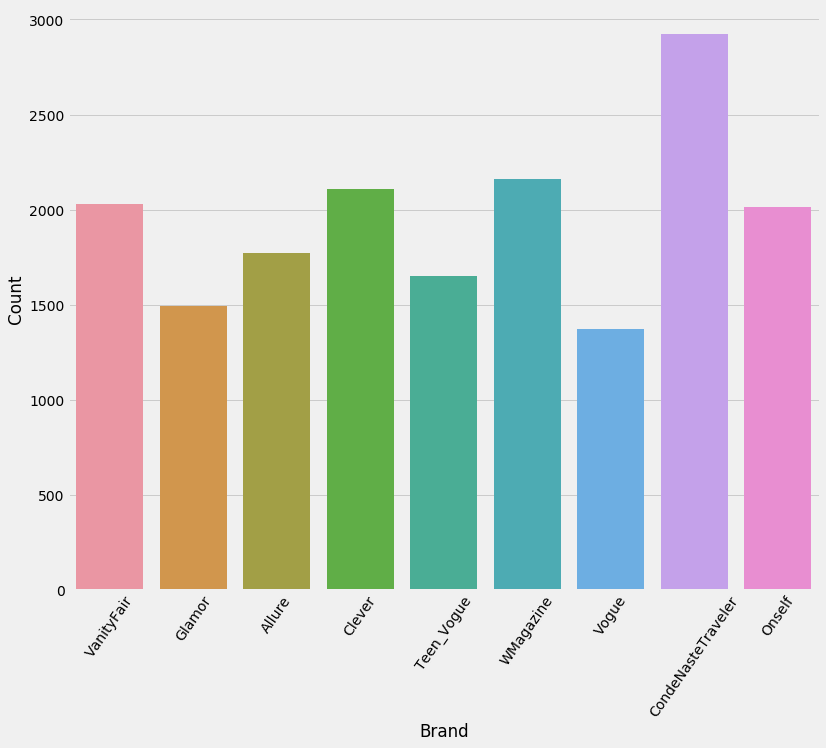

In [34]:
_ = sns.countplot(x=IGPics['brand'], data=IGPics)
_ = plt.xticks(rotation = 55)
_ = plt.ylabel('Count')
_ = plt.xlabel('Brand')

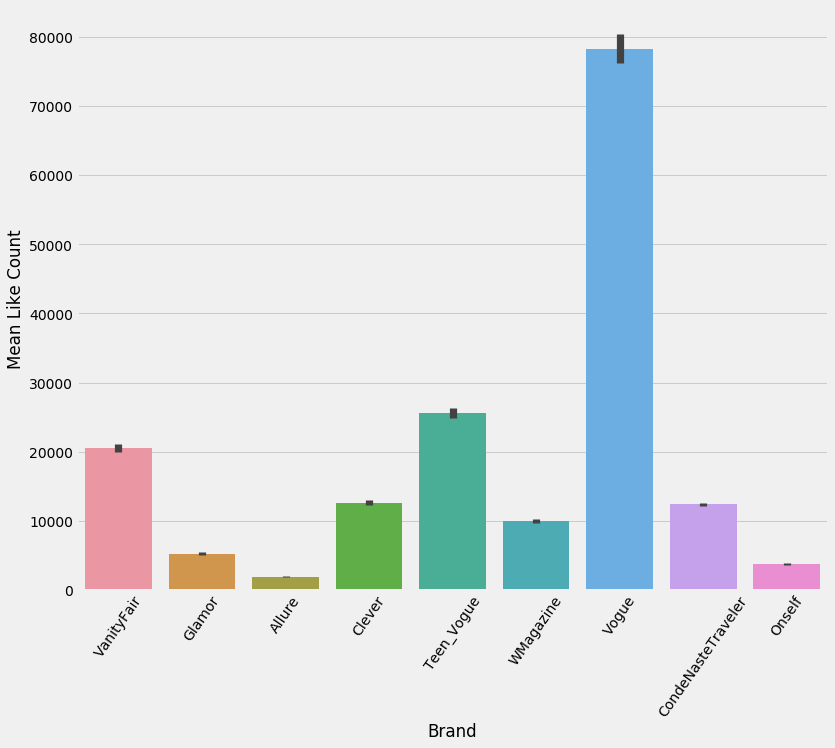

In [35]:
sns.barplot(x = IGPics['brand'], y = IGPics['Like_Count'])
_ = plt.xlabel('Brand')
_ = plt.ylabel('Mean Like Count')
_ = plt.xticks(rotation = 55)
_ = plt.show()

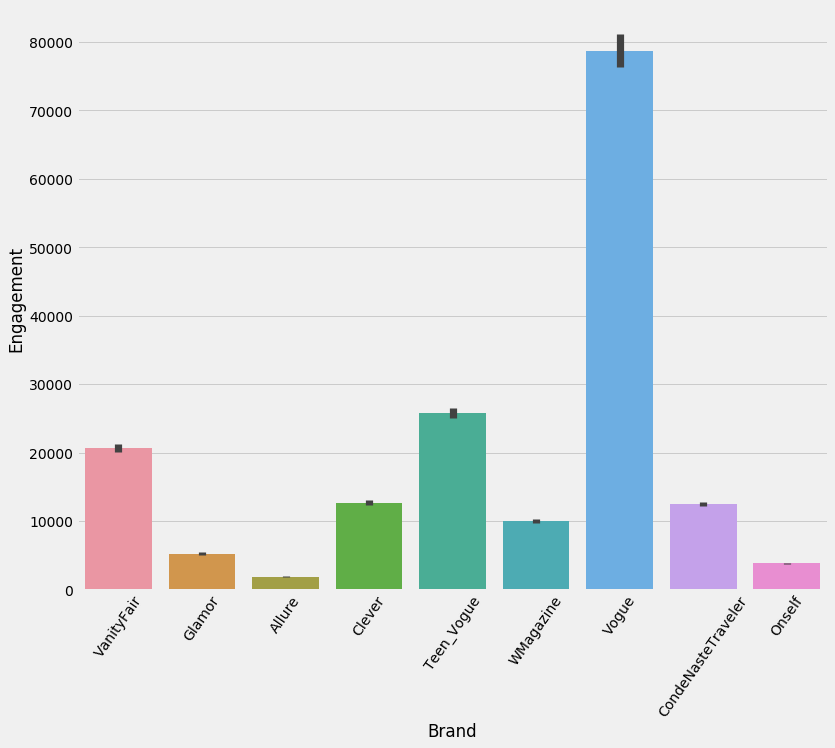

In [36]:
sns.barplot(x = IGPics['brand'], y = IGPics['engagement'])
_ = plt.xlabel('Brand')
_ = plt.xticks(rotation = 55)
_ = plt.ylabel('Engagement')
_ = plt.show()

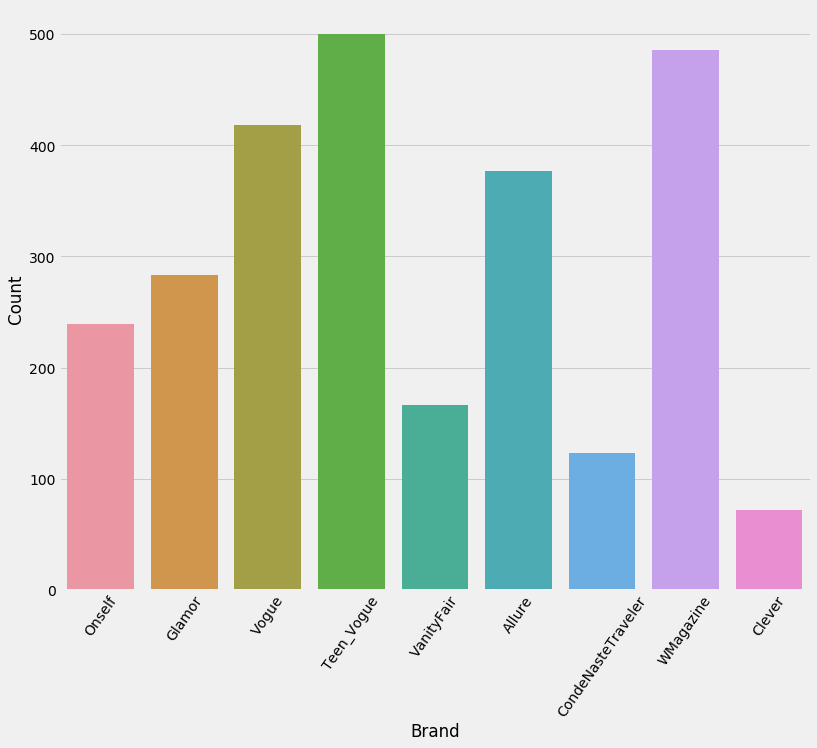

In [37]:
_ = sns.countplot(x=IGVids['brand'], data=IGVids)
_ = plt.xticks(rotation = 55)
_ = plt.ylabel('Count')
_ = plt.xlabel('Brand')

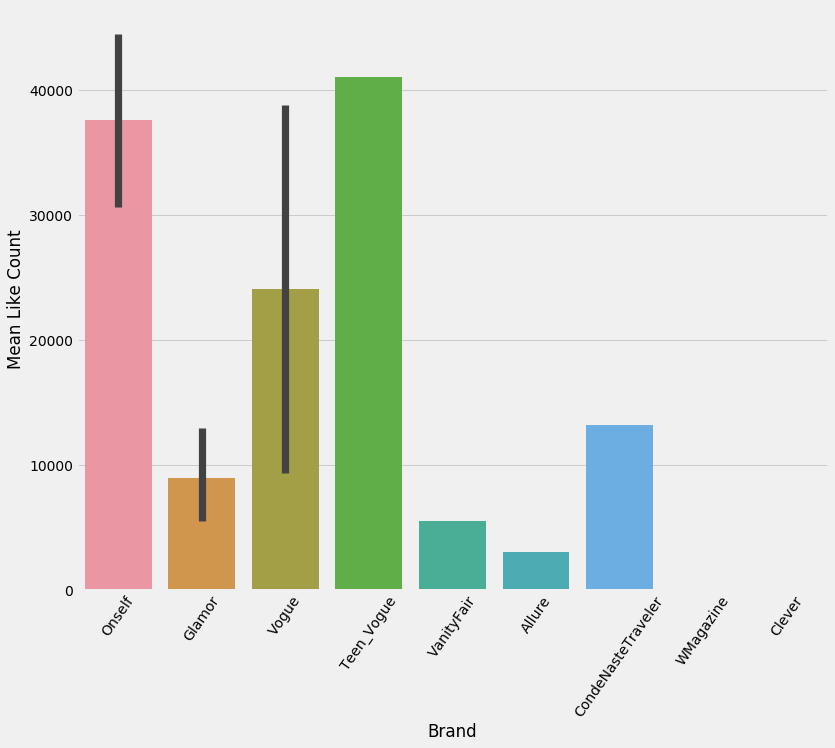

In [38]:
sns.barplot(x = IGVids['brand'], y = IGVids['Like_Count'])
_ = plt.xlabel('Brand')
_ = plt.ylabel('Mean Like Count')
_ = plt.xticks(rotation = 55)
_ = plt.show()

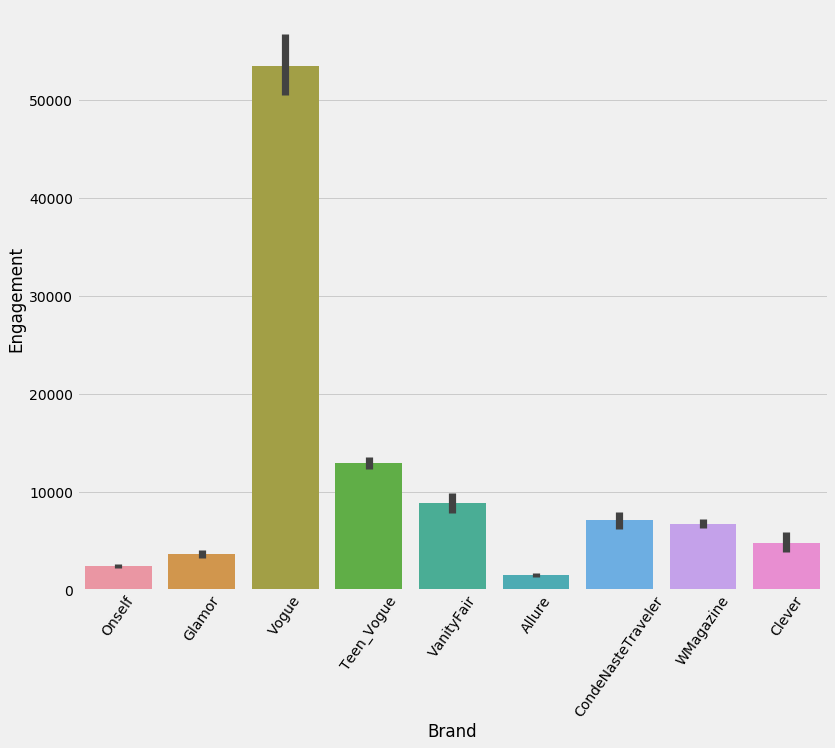

In [39]:
sns.barplot(x = IGVids['brand'], y = IGVids['engagement'])
_ = plt.xlabel('Brand')
_ = plt.xticks(rotation = 55)
_ = plt.ylabel('Engagement')
_ = plt.show()

# Data Export

## Grabbing image/video urls for later analysis

In [40]:
imageurls = []

for i in range(len(picframe['image_url'])):
    imageurls.append(picframe['image_url'][i])

In [41]:
vidurls = []

for i in range(len(vidframe['video_url'])):
    vidurls.append(vidframe['video_url'][i])

In [42]:
with open("./assets/InstaPicsImageURLS.csv", "a") as ip:
    wi = csv.writer(ip, dialect='excel')
    wi.writerows([x.split(',') for x in imageurls])
    ip.close()    

In [43]:
with open("./assets/InstaVidsVideoURLS.csv", "a") as iv:
    wv = csv.writer(iv, dialect='excel')
    wv.writerows([x.split(',') for x in vidurls])
    iv.close

In [44]:
picframe.isnull().sum()

caption          1
comment_count    0
filter_name      0
hashtags         0
image_url        0
like_count       0
link             0
links            0
post_id          0
dtype: int64

In [45]:
# from sklearn.feature_extraction.text import CountVectorizer

# picvect = CountVectorizer(analyzer = "word",   
#                              tokenizer = None,    
#                              preprocessor = None, 
#                              stop_words = 'english',   
#                              max_features = 10000,
#                              min_df = 1)

# vidvect = CountVectorizer(analyzer = "word",   
#                              tokenizer = None,    
#                              preprocessor = None, 
#                              stop_words = 'english',   
#                              max_features = 10000,
#                              min_df = 1)

In [46]:
# picthashcorp = picvect.fit_transform(pichash)
# pichashcorparray = picthashcorp.toarray()

# vidhashcorp = picvect.fit_transform(vidhash)
# vidhashcorparray = vidhashcorp.toarray()

In [47]:
# from sklearn.neighbors import KNeighborsClassifier

# picclf = KNeighborsClassifier(n_neighbors=5)
# picclf.fit(pichashcorparray, ) #Needs a y value

# Modeling Functions (WORK IN PROGRESS!)

## Setting up Hashes for CountVectorizer

In [48]:
pichash = picframe['hashtags'].value_counts()
pichash = pichash.iloc[1:]
pichash = pichash.astype(str)

In [49]:
vidhash = vidframe['hashtags'].value_counts()
vidhash = vidhash.iloc[1:]
vidhash = vidhash.astype(str)

## Count Vectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

def InstaVect(wordseries, Y):
    try:
        wordseries = wordseries.astype(str)
    except ValueError:
        print("ERROR: Entries must be string or list of strings.")
    
    vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = 'english',   
                             max_features = 10000,
                             min_df = 1)
    corpus = vectorizer.fit_transform(wordseries)
    corpus = corpus.to_array
    
    classifier = KNeighborsClassifier(n_neighbors=5)
    
    return classifier.fit(corpus, y=Y)

#Don't know if this works

## Bog Standard SLR

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets, linear_model

def SLR(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
        
    scores = cross_val_score(model, X_train, y_train, cv = 6)
    predictions = cross_val_predict(model, , , cv = 6)
    accuracy = metrics.r2_score(y_test, predictions)
    
    plt.scatter(y, predictions)
    plt.show()    
    
    print("Cross-Predicted Accuracy: ", accuracy)
    
#Ditto. Getting an array error. Hate that one.

SyntaxError: invalid syntax (<ipython-input-51-289c6e321047>, line 14)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

def LogReg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    logreg = linear_model.LogisticRegression()
    model = logreg.fit(X_train,y_train)
    predictions = logreg.predict(X_test)
    
    scores = cross_val_score(model, X_train, y_train, cv = 6)
    predictions = cross_val_predict(model, , , cv = 6)
    accuracy = metrics.scores()
    
    plt.scatter(y, predictions)
    plt.show
    
    print("Cross-Predicted Accuracy: ", accuracy)

## Decision Tree

### Instagram Image Data

In [ ]:
IGPics.head(1)

In [ ]:
Xc = IGPics[['Like_Count', 'Comment_Count']]
yc = IGPics['impact']


In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(Xc, yc)

clfscores = cross_val_score(clf, Xc, yc, cv = 3)
print(clfscores, np.mean(clfscores))